# Subway and Starbucks Location Data Analysis

Below we are going to analyze some data from Subway and Starbucks location in Austin area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('subway.csv')
hi = pd.read_csv('starbucks.csv')

## I collected data on subway and starbucks location all over the country, including their zip code, address and open hours.

In [2]:
df.head()

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,NaN,NaN,NaN,...,NaN,NaN,"Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:...",38.8043,-77.0611,NaN,NaN,NaN,NaN,NaN
1,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1512 King St,",Alexandria,VA,22301,USA,NaN,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...",38.8062,-77.0565,NaN,NaN,NaN,NaN,NaN
2,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,NaN,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:30 PM, Monday 6:30 AM - 9:0...",38.8012,-77.0691,NaN,NaN,NaN,NaN,NaN
3,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,NaN,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...",38.8045,-77.0433,NaN,NaN,NaN,NaN,NaN
4,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,NaN,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 9:00 PM, Monday 7:00 AM - 10:...",38.7903,-77.0769,NaN,NaN,NaN,NaN,NaN


## I got rid of some unnecessary columns

In [3]:
df = df.drop(['latitude','longitude','facebook','twitter','instagram','pinterest','youtube','phone_number_1','phone_number_2','fax_1','fax_2','email_1','email_2','website'], axis= 1)
hi = hi.drop(['latitude','longitude','url','facebook','twitter','instagram','pinterest','youtube','phone_number_1','phone_number_2','fax_1','fax_2','email_1','email_2','website'], axis= 1)

In [4]:
df.head()

,name,url,street_address,city,state,zip_code,country,open_hours
0,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,"Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:..."
1,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1512 King St,",Alexandria,VA,22301,USA,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0..."
2,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,"Sunday 9:00 AM - 8:30 PM, Monday 6:30 AM - 9:0..."
3,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0..."
4,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,"Sunday 9:00 AM - 9:00 PM, Monday 7:00 AM - 10:..."


### I pulled out two things I wanted to look at: state and zip code.

In [5]:
zip_and_state = df[['state','zip_code']]

In [6]:
zip_and_state_table = pd.crosstab(zip_and_state['zip_code'],
                           zip_and_state['state'], 
                               margins = False)
print(zip_and_state_table)

state       AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  \
zip_code                                            ...                       
00601        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
00602        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
00603        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
00610        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
00612        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
99801        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
99801-8029   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
99835-7568   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
99901        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
99901-6409   1   0   0   0   0   0   0   0   0   0  

## I pulled out city of Austin from the original data to see stores in Austin area

In [7]:
texassubway = df[df['city'] == 'Austin']
print(texassubway)

         name                                                url  \
14927  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
14928  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21843  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21844  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21845  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21846  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21847  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21851  Subway                                                NaN   
21855  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21856  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21857  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21858  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21859  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
21860  Subway  http://order.subway.com/Stores/Re

In [8]:
texassubway_many = texassubway.groupby(['zip_code'])['zip_code'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)
print(texassubway_many)

      zip_code  Count
3        78704      4
26       78753      4
17       78741      4
6        78717      3
22       78748      3
18       78744      3
0        55912      2
14       78731      2
28       78758      2
25       78752      2
24       78750      2
1        78701      2
15       78735      2
8        78723      2
11       78727      2
2        78702      2
23       78749      1
29       78759      1
27       78757      1
4        78705      1
5   78705-5618      1
7        78721      1
13       78729      1
12       78728      1
21       78747      1
20       78746      1
19       78745      1
9        78724      1
10       78726      1
16       78736      1
30       78763      1


In [9]:
texassubway_many.head()

,zip_code,Count
3,78704,4
26,78753,4
17,78741,4
6,78717,3
22,78748,3


In [10]:
hi.head()

,name,street_address,city,state,zip_code,country,open_hours
0,"Meritxell, 96","Av. Meritxell, 96",Andorra la vella,NaN,AD500,AD,"Monday : 8:00 AM to 9:00 PM, Tuesday : 8:00 AM..."
1,"Val Vista & Baseline, Mesa","1939 S Val Vista Dr, #D",Mesa,AZ,852047314,US,"Monday : 4:30 AM to 8:30 PM, Tuesday : 4:30 AM..."
2,Debenhams Yas Mall,YAS Island,Abu Dhabi,AZ,NaN,AE,"Monday : 10:00 AM to 10:00 PM, Tuesday : 10:00..."
3,"Val Vista & Southern, Mesa","3550 E. Southern Avenue, #104",Mesa,AZ,852045683,US,"Monday : 4:00 AM to 9:30 PM, Tuesday : 4:00 AM..."
4,Safeway - Mesa #1637,3622 E Southern Ave,Mesa,AZ,852062504,US,"Monday : 6:00 AM to 6:00 PM, Tuesday : 6:00 AM..."


In [11]:
hi.head()

,name,street_address,city,state,zip_code,country,open_hours
0,"Meritxell, 96","Av. Meritxell, 96",Andorra la vella,NaN,AD500,AD,"Monday : 8:00 AM to 9:00 PM, Tuesday : 8:00 AM..."
1,"Val Vista & Baseline, Mesa","1939 S Val Vista Dr, #D",Mesa,AZ,852047314,US,"Monday : 4:30 AM to 8:30 PM, Tuesday : 4:30 AM..."
2,Debenhams Yas Mall,YAS Island,Abu Dhabi,AZ,NaN,AE,"Monday : 10:00 AM to 10:00 PM, Tuesday : 10:00..."
3,"Val Vista & Southern, Mesa","3550 E. Southern Avenue, #104",Mesa,AZ,852045683,US,"Monday : 4:00 AM to 9:30 PM, Tuesday : 4:00 AM..."
4,Safeway - Mesa #1637,3622 E Southern Ave,Mesa,AZ,852062504,US,"Monday : 6:00 AM to 6:00 PM, Tuesday : 6:00 AM..."


In [12]:
texasstarbucks = hi[hi['city'] == 'Austin']

print(texasstarbucks)

                                name                    street_address  \
4003              S. Lamar & Collier  1509 South Lamar Blvd, Suite 100   
4015                    1st & Oltorf                      516 W Oltorf   
4016       Barton Springs & S. Lamar            1200 Barton Springs Rd   
4028            Hyatt Regency Austin             208 Barton Springs Rd   
4029              JW Marriott Austin                   110 E Second St   
...                              ...                               ...   
9234   The Domain on Century Oaks Tr   11410 Mopac Expressway, Ste C09   
9237            The Domain Northside                3120 Palm Way, 110   
10354                 Mopac & Parmer                  2505 Parmer Lane   
10355                Metric & Parmer                1700 W Parmer Lane   
10356                Parmer & Dessau    1606 E. Parmer Lane, Suite 100   

         city state   zip_code country  \
4003   Austin    TX  787042966      US   
4015   Austin    TX      78

In [13]:
texasstarbucks_many = texasstarbucks.groupby(['zip_code'])['zip_code'].count().reset_index(name='Count').sort_values(['Count'],ascending=False)
print(texasstarbucks_many)

     zip_code  Count
10      78704      3
1       78701      2
43  787481752      1
31  787314974      1
32      78736      1
33  787373506      1
34      78738      1
35      78741      1
36  787441773      1
37      78746      1
38  787466600      1
39  787466672      1
40  787468101      1
41      78748      1
42  787481733      1
0       75783      1
30  787311319      1
45  787491112      1
46  787491430      1
47  787491982      1
48  787492226      1
49      78750      1
50      78753      1
51  787563401      1
52  787571102      1
53      78758      1
54  787593501      1
55  787595722      1
56  787595803      1
44  787485802      1
29      78731      1
28  787296801      1
14  787047518      1
2   787011516      1
3   787012971      1
4   787013612      1
5   787015000      1
6       78703      1
7   787031437      1
8   787033615      1
9   787035427      1
11  787042966      1
12  787044447      1
13  787047488      1
15  787048802      1
27  787274604      1
16      78705

In [14]:
texasstarbucks_many.head()

,zip_code,Count
10,78704,3
1,78701,2
43,787481752,1
31,787314974,1
32,78736,1


In [15]:
texassubway_many.head()

,zip_code,Count
3,78704,4
26,78753,4
17,78741,4
6,78717,3
22,78748,3


## I made a bar graphs for both starbucks and subway- to see which zip code area has more branch 

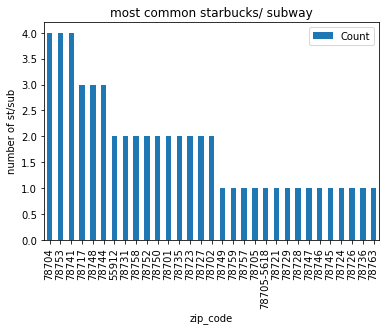

In [16]:

graph = texassubway_many.plot.bar(title="most common starbucks/ subway", x='zip_code', y='Count', ylabel='number of st/sub')

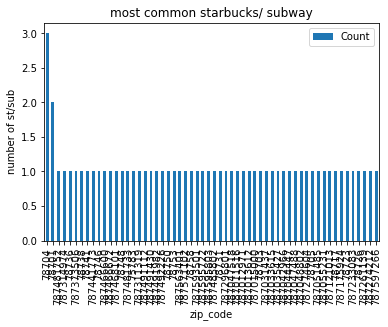

In [17]:
graph = texasstarbucks_many.plot.bar(title="most common starbucks/ subway", x='zip_code', y='Count', ylabel='number of st/sub')

Surprisingly, zip code 78704 had the most locations on both starbucks and subway in Austin area.